<a href="https://colab.research.google.com/github/unknown-jun/Deep_learning/blob/main/cnn_%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:

!pip install kora

from kora import console

console.start()  # and click lin

Console URL: https://teleconsole.com/s/c8a576aaa36e225dc2bddb624213f3bcbc16b8ec


In [3]:
#1. 필요한 패키지 다운로드 한다.
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,MaxPooling2D, Dense, BatchNormalization, Dropout,Conv2D,Activation
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
tf.random.set_seed(777)
#from loader_leaf import label_load, image_load
import loader_leaf

#2. mnist 데이터를 불러온다.
train_image="/content/gdrive/MyDrive/samples4/train_resize3/"
test_image="/content/gdrive/MyDrive/samples4/test_resize2/"
train_label ="/content/gdrive/MyDrive/samples4/train_label.csv"
test_label ="/content/gdrive/MyDrive/samples4/test_label.csv"

x_train = loader_leaf.image_load(train_image)
x_test = loader_leaf.image_load(test_image)
y_train = loader_leaf.label_load(train_label)
y_test =  loader_leaf.label_load(test_label)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x_train.shape[1:])

(19000, 32, 32, 3)
(1000, 32, 32, 3)
(19000, 2)
(1000, 2)
(32, 32, 3)


In [4]:
# 3. 하이퍼 파라미터를 설정한다. 
batch_size = 100
num_classes = 2
epochs = 200

In [5]:
model = Sequential()

# convolution 1층
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))

# convolution 2층
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# convolution 3층 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# convolution 4층 
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 완전연결계층 1층 
model.add(Flatten())  #  완전 연결계층에 입력할때는 flatten 시켜야합니다. 
model.add(Dense(512))  # 완전 연결계층 1층의 뉴런의 갯수를 512개 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# 출력층
model.add(Dense(num_classes)) # 출력층의 뉴런의 개수 2개 (수지와 설현 분리므로)
model.add(Activation('softmax'))


In [7]:
#2. mnist 데이터를 불러온다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, 
                                                  random_state = 777)

x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255

print(x_train.shape)

#6. 신경망 모델을 설정한다. 

model.compile(optimizer='Adam', 
              loss = 'categorical_crossentropy', 
              metrics=['acc'])

 #7. 신경망 모델을 훈련 시킨다. 
from tensorflow.python.keras.callbacks import EarlyStopping
history = model.fit(x_train, y_train, 
                    epochs = 200, 
                    batch_size = 100, 
                    validation_data = (x_val, y_val), 
                    verbose=1)

(13300, 32, 32, 3)
Epoch 1/200
133/133 [==============================] - 32s 11ms/step - loss: 0.5764 - acc: 0.7351 - val_loss: 1.0182 - val_acc: 0.4998
Epoch 2/200
133/133 [==============================] - 1s 9ms/step - loss: 0.3216 - acc: 0.8615 - val_loss: 0.5082 - val_acc: 0.7247
Epoch 3/200
133/133 [==============================] - 1s 9ms/step - loss: 0.2527 - acc: 0.8915 - val_loss: 0.5139 - val_acc: 0.7288
Epoch 4/200
133/133 [==============================] - 1s 9ms/step - loss: 0.2273 - acc: 0.9111 - val_loss: 0.5768 - val_acc: 0.7433
Epoch 5/200
133/133 [==============================] - 1s 9ms/step - loss: 0.1932 - acc: 0.9200 - val_loss: 0.3172 - val_acc: 0.8712
Epoch 6/200
133/133 [==============================] - 1s 9ms/step - loss: 0.1717 - acc: 0.9328 - val_loss: 0.3323 - val_acc: 0.8633
Epoch 7/200
133/133 [==============================] - 1s 9ms/step - loss: 0.1422 - acc: 0.9435 - val_loss: 0.3485 - val_acc: 0.8667
Epoch 8/200
133/133 [===========================

In [8]:
# 8. 모델을 평가한다. 
model.evaluate(x_test, y_test)

#9. 테스트 데이터의 정확도를 확인한다.
results = model.predict(x_test)

# 정확도 확인 
import  numpy  as  np

y_hat=np.argmax(results, axis=1)
y_label=np.argmax(y_test, axis=1)
sum(y_hat==y_label)/len(y_label)


32/32 [==============================] - 0s 4ms/step - loss: 0.1788 - acc: 0.9650


0.965

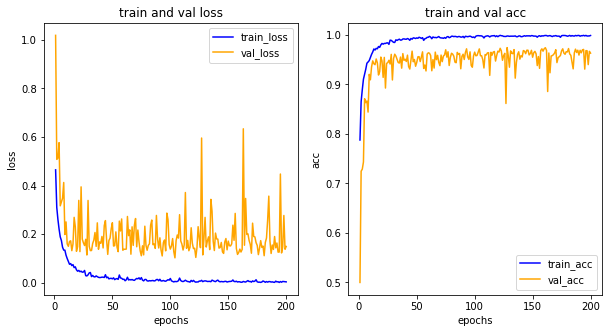

In [9]:
# 시각화
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

# mnist 신경망 구성 (cnn 적용 안한것)

In [37]:
# 1. 필요한 패키지 가져오는 코드
import tensorflow as tf  # 텐서플로우 2.0
from tensorflow.keras.datasets.mnist import load_data # 텐서플로우에 내장되어 있는 mmnist데이터를 가져온다.
from tensorflow.keras.models import Sequential # 모델을 구성하는 패키지
from tensorflow.keras.layers import Dense # 완전 연결계층을 구성하기 위한 패키지
from tensorflow.keras.utils import to_categorical # one hot encoding 하는 모듈
from sklearn.model_selection import train_test_split # 훈련과 검정 데이터를 분리하는 모듈
import numpy as np
tf.random.set_seed(777)

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz') # mnist데이터 로드
# 훈련 데이터 6만장, 테스트 데이터 1만장

# 훈련데이터를 가지고 훈련과 검정 데이터로 분리(7 : 3으로 분리)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, 
                                                  random_state = 777)
print(x_train.shape)
print(x_val.shape)

(42000, 28, 28)
(18000, 28, 28)


In [38]:
# 데이터를 정규화
num_x_train = x_train.shape[0] # (42000, 28, 28, 1)
num_x_val = x_val.shape[0] # 18000
num_x_test = x_test.shape[0] #10000

# 3차원 --> 2차원으로 차원 축소하고서 정규화 진행
# 한 픽셀이 0~255 사이로 되어 있는데 이걸 0 ~ 1 사이로 변경
x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255
# 위의 정규화 작업을 한 것과 안한 것과의 차이가 아주 큼

# 하나의 숫자를 one hot encoding한다. (예: 4 ---> 0 0 0 0 1 0 0 0 0 0 )
y_train = to_categorical(y_train) # 훈련 데이터의 레이블(정답)을 one hot encoding 
y_val = to_categorical(y_val)   # 검정 데이터의 레이블(정답)을 one hot encoding
y_test = to_categorical(y_test) # 테스트 위의 정규화 작업을 한 것과 안한 것과의 차이가 아주 큼


In [39]:
print(x_val.shape)
y_val.shape

(18000, 784)


(18000, 10)

In [40]:
# 모델을 구성
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (784, )))  # 1층
model.add(Dense(32, activation = 'relu'))    # 2층
model.add(Dense(10, activation = 'softmax')) # 3층 출력층

# 모델을 설정 ( 경차 하강법, 오차함수)
model.compile(optimizer='adam', 
              loss = 'categorical_crossentropy', 
              metrics=['acc'])  # 학습과정에서 정확도를 보기 위함

# 모델을 훈련시킴
history = model.fit(x_train, y_train, 
                    epochs = 30,  # 30 에폭
                    batch_size = 100, 
                    validation_data = (x_val, y_val))

# 모델을 평가함 ( 오차, 정확도가 출력됨 )
model.evaluate(x_test, y_test)

# 테스트 데이터의 예측값을 출력함
results = model.predict(x_test)

# 정확도를 확인함
y_hat = np.argmax(results, axis=1)
y_label = np.argmax( y_test, axis = 1)

print(np.sum( y_hat == y_label ) / len(y_test) )

Epoch 1/30
420/420 [==============================] - 2s 3ms/step - loss: 0.8336 - acc: 0.7450 - val_loss: 0.2391 - val_acc: 0.9322
Epoch 2/30
420/420 [==============================] - 1s 3ms/step - loss: 0.2163 - acc: 0.9367 - val_loss: 0.1782 - val_acc: 0.9494
Epoch 3/30
420/420 [==============================] - 1s 3ms/step - loss: 0.1546 - acc: 0.9551 - val_loss: 0.1522 - val_acc: 0.9558
Epoch 4/30
420/420 [==============================] - 1s 3ms/step - loss: 0.1205 - acc: 0.9635 - val_loss: 0.1261 - val_acc: 0.9632
Epoch 5/30
420/420 [==============================] - 1s 3ms/step - loss: 0.0944 - acc: 0.9730 - val_loss: 0.1254 - val_acc: 0.9634
Epoch 6/30
420/420 [==============================] - 1s 3ms/step - loss: 0.0803 - acc: 0.9777 - val_loss: 0.1143 - val_acc: 0.9674
Epoch 7/30
420/420 [==============================] - 1s 3ms/step - loss: 0.0655 - acc: 0.9798 - val_loss: 0.1063 - val_acc: 0.9684
Epoch 8/30
420/420 [==============================] - 1s 3ms/step - loss: 0.

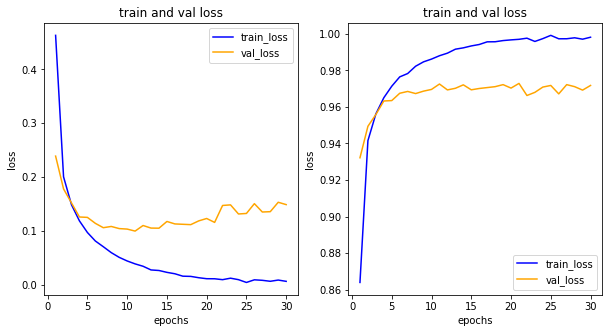

In [41]:
# 시각화
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

패션 mnist

Epoch 1/30
329/329 [==============================] - 2s 4ms/step - loss: 0.9383 - acc: 0.6838 - val_loss: 0.4868 - val_acc: 0.8342
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4555 - acc: 0.8401 - val_loss: 0.4494 - val_acc: 0.8468
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4044 - acc: 0.8618 - val_loss: 0.3994 - val_acc: 0.8611
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3759 - acc: 0.8674 - val_loss: 0.3864 - val_acc: 0.8666
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3550 - acc: 0.8737 - val_loss: 0.3653 - val_acc: 0.8688
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3421 - acc: 0.8761 - val_loss: 0.3614 - val_acc: 0.8705
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3153 - acc: 0.8873 - val_loss: 0.3437 - val_acc: 0.8749
Epoch 8/30
329/329 [==============================] - 1s 3ms/step - loss: 0.

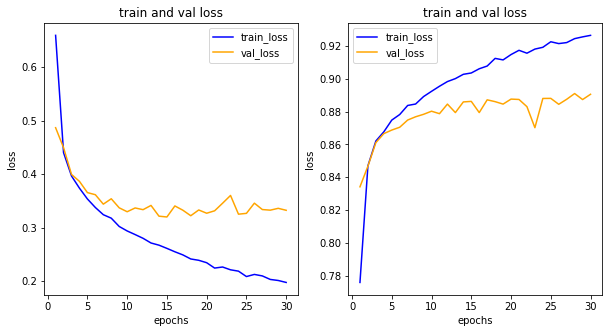

In [42]:

from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.utils import to_categorical

# Fashion-MNIST 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data()

# 신경망 데이터 넣기전에 데이터 정규화( 값의 범위를 0~1 로 만들어 줍니다.)
x_train = x_train / 255
x_test = x_test / 255 

# 라벨을 one hot encoding 해준다. 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 훈련 데이터에 대한 검정을 위해 validatation 데이터를 만든다.
# 테스트 데이터는 나중에 시험볼때 사용할 것이므로 그냥 두고
# 훈련 데이터만 7대3 으로 분리 합니다. 
import  tensorflow as tf

from sklearn.model_selection import train_test_split

tf.random.set_seed(777)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)

# 모델을 구성한다. 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


model = Sequential()
model.add( Flatten(input_shape =(28,28)) )   # 완전연결계층으로 데이터 입력
model.add(Dense(64, activation = 'relu'))  # 64개의 뉴런을 가진 1층
model.add(Dense(32, activation = 'relu'))  # 32개의 뉴런을 가진 2층
model.add(Dense(10, activation = 'softmax')) # 10개 뉴런을 가진 출력층

# 학습과정 설정하기 

model.compile(optimizer='adam', 
                    loss = 'categorical_crossentropy', 
                    metrics=['acc'])  # 모니터링할 평가지표 : acc

# 모델 학습하기 

history = model.fit(x_train, y_train, 
                        epochs = 30, 
                        batch_size = 128, 
                        validation_data = (x_val, y_val))

# 모델 평가하기 
model.evaluate(x_test, y_test)

# 시각화
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()


# mnist 신경망 구성 (cnn 적용 안한것)

In [47]:
# 필요한 모듈을 로드
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Fashion-MNIST 데이터를 다운받습니다.
# 정규화를 진행
(x_train, y_train), (x_test, y_test) = load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape)

(60000, 28, 28)


In [48]:
x_train = x_train.reshape(-1,28,28,1) # 3차원 ---> 4차원으로 변경
# cnn 층에 데이터를 입력할 때는 4차원으로 입력해줘야 하기 때문x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape)

(60000, 28, 28, 1)


In [49]:
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1,28,28,1) # 3차원 ---> 4차원으로 변경
# cnn 층에 데이터를 입력할 때는 4차원으로 입력해줘야 하기 때문

# 원핫인코딩 (one-hot encoding) 처리
y_train = to_categorical(y_train) # 훈련 데이터의 정답을 one hot encoding
y_test = to_categorical(y_test)  # 테스트 데이터의 정답을 one hot encoding

# 훈련 데이터를 훈련과 검정 데이터로 7:3으로 나눈다.
from sklearn.model_selection import train_test_split
x_train , x_val , y_train , y_val = train_test_split(x_train, y_train, test_size=0.3,random_state=777)

# 모델을 구성함
model = Sequential()
model.add( Conv2D(64,kernel_size=2,input_shape=x_train.shape[1:]) ) # (28, 28, 1) conv 1층
model.add( Conv2D(64, kernel_size=(5,5),input_shape=(28,28,1), activation='relu') )  #conv 2층
model.add( MaxPooling2D(pool_size=(2, 2), padding='same') )

model.add( Flatten() )

model.add(  Dense(128, activation='relu') ) # 완전연결계층 1층
model.add(  Dropout(0.2) )

model.add(Dense(128, activation='relu') ) # 완전연결계층 2층
model.add(  Dropout(0.2) )

model.add(  Dense(32, activation='relu') ) # 완전연결 계층 3층
model.add(  Dropout(0.2) )

model.add(  Dense(10, activation='softmax') ) # 출력층 4층



model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train, y_train, batch_size=100 ,epochs=30, validation_data=(x_val ,y_val))

Epoch 1/30
420/420 [==============================] - 4s 8ms/step - loss: 1.6364 - accuracy: 0.3760 - val_loss: 0.6244 - val_accuracy: 0.7656
Epoch 2/30
420/420 [==============================] - 3s 7ms/step - loss: 0.7152 - accuracy: 0.7341 - val_loss: 0.5263 - val_accuracy: 0.7972
Epoch 3/30
420/420 [==============================] - 3s 7ms/step - loss: 0.5691 - accuracy: 0.7865 - val_loss: 0.4363 - val_accuracy: 0.8410
Epoch 4/30
420/420 [==============================] - 3s 7ms/step - loss: 0.5021 - accuracy: 0.8157 - val_loss: 0.4033 - val_accuracy: 0.8521
Epoch 5/30
420/420 [==============================] - 3s 7ms/step - loss: 0.4721 - accuracy: 0.8308 - val_loss: 0.3687 - val_accuracy: 0.8693
Epoch 6/30
420/420 [==============================] - 3s 7ms/step - loss: 0.4328 - accuracy: 0.8464 - val_loss: 0.3590 - val_accuracy: 0.8688
Epoch 7/30
420/420 [==============================] - 3s 7ms/step - loss: 0.3982 - accuracy: 0.8555 - val_loss: 0.3355 - val_accuracy: 0.8797
Epoch 

In [50]:
x_test = x_test.reshape(-1,28,28,1) # 3차원 ---> 4차원으로 변경
# cnn 층에 데이터를 입력할 때는 4차원으로 입력해줘야 하기 때문x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape)

# 모델을 평가함 ( 오차, 정확도가 출력됨 )
model.evaluate(x_test, y_test)

# 테스트 데이터의 예측값을 출력함
results = model.predict(x_test)

# 정확도를 확인함
y_hat = np.argmax(results, axis=1)
y_label = np.argmax( y_test, axis = 1)

print ( np.sum( y_hat == y_label ) / len(y_test) )

(42000, 28, 28, 1)
313/313 [==============================] - 1s 3ms/step - loss: 0.2994 - accuracy: 0.8986
0.8986
